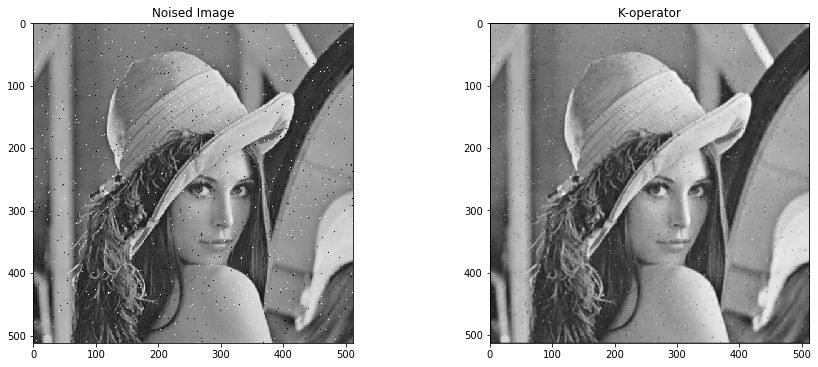

In [156]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import random

def SaltAndPaper(image, density):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # parameter for controlling how much salt and paper are added
    threshhold = 1 - density

    # loop every each pixel and decide add the noise or not base on threshhold (density)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            possibility = random.random()
            if possibility < density:
                output[i][j] = 0
            elif possibility > threshhold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

def koperator(image):
    #dimensions of input image
    row = len(image)
    col = len(image[0])
    #print(image[0,0])
    #here we do Zero-Padding to image as mention in paper
    new_image = np.zeros([row+2,col+2],dtype=int)
    for i in range(row+2):
        for j in range(col+2):
            if i==0 or i==row+1:
                new_image[i,j]=0
            elif j==0 or j==col+1:
                new_image[i,j]=0
            else:
                new_image[i,j]=image[i-1,j-1]
    #print(new_image[1,1])
    
    #now we make a fractional mask using k-opertor of size 3X3
    #we perform masking using p=1 and q=0 and also taking a(alpha) in range(0,2) so we choose a=1
    p=1.05
    q=0
    a=1
    
    #for finding these coefficient we also need y1(a) value(given in paper) here for 3X3 filter n=1 and a=1 so a-n=0
    #in this y1(a) function gammma function also given for whose value at 1 = 1 and at 1/2 equals to sqrt(pi)(find these by integral)
    #y1=((-1)**((n-a)/2))*(2**(a-1))*((math.pi)**(n/2))*(math.sqrt(math.pi))
    x=math.sqrt(math.pi)
    x=round(x,3)
    x1=(math.pi)**(1/2)
    x1=round(x1,3)
    #now put these value in y1
    y1=((-1)**((1-a)/2))*(2**(a-1))*(x1)*(x)
    y1=round(y1,3)
    #as giving in paper in Table 2 superposition in all eight direction we need to coffiecient Co and C1
    Co=(p+q)/(2*a*y1)
    Co=round(Co,3)
    C1=((2**(a))*p)/(2*a*y1)
    C1=round(C1,3)
    # create the mask array of filter as same size as filter_size of 9 beacuse 3X3 having size 9
    mask = np.zeros([3,3],dtype=float)
    
    total=(8*Co)+C1
    for i in range(3):
        for j in range(3):
            if i==1 and j==1:
                mask[i][j]=(8*Co)/total
            else:
                mask[i][j]=C1/total
    #print(mask)
    
    #apply Fractional-Mask
    output = np.zeros([row+1,col+1],dtype=float)
    result = 0
    #convolution
    for i in range(1, row+1):
            for j in range(1, col+1):
                for x in range(-1, 2):
                    for y in range(-1, 2):
                        result = result + new_image[i+x, j+y]*mask[x+1,y+1]
                output[i][j] = result
                result = 0
    
    #print(output)
    return output

#this is main function 
if __name__ == '__main__':
     
    #import the image and stor it in variable "img"
    img = cv2.imread('lena.png')
    
    #convert original image to grayscale image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    grayImg = SaltAndPaper(gray, 0.004)
    #filter the image using K-Operator by calling function koperator and pass image as argument
    finalimg = koperator(grayImg)
    #plt.imshow(img,cmap='gray')
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(15)

    # display the oringinal image
    fig.add_subplot(3, 2, 1)
    plt.title('Noised Image')
    plt.imshow(grayImg, cmap='gray')

    # display the salt and paper image
    fig.add_subplot(3, 2, 2)
    plt.title('K-operator')
    plt.imshow(finalimg, cmap='gray')